In [ ]:
# This reads in pickle files of slices that each represent average KS values 
# from a cube of slices. Then a single average is made (i.e., an average of 
# averages).

# Created 2020 July 14 by E.S.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import glob

In [2]:
file_name_array = glob.glob("data/ks_data_test_*.p")

In [3]:
# the critical KS value

crit_level = [0.263801]

In [6]:
# load some other stats for plotting

vital_stats = pickle.load( open( "data/vital_stats_test_0E.p" , "rb" ) )
#df = vital_stats

In [9]:
df = vital_stats["df_stuff"]
comp_ampl_mag = vital_stats["comp_ampl_mag"]

In [12]:
# initialize cube

cube_ks_slices = np.ones((len(file_name_array),
                          np.shape(cube_stat_no_interp_avg)[0],
                          np.shape(cube_stat_no_interp_avg)[1]))

0


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'color'


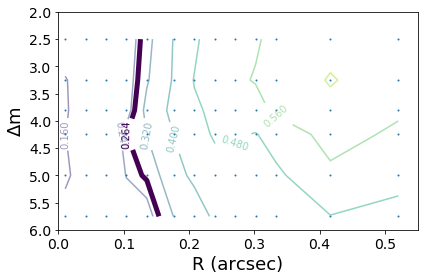

1


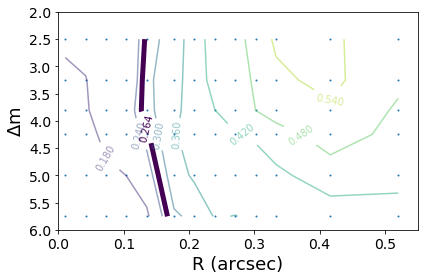

2


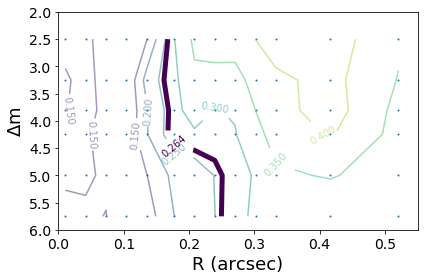

3


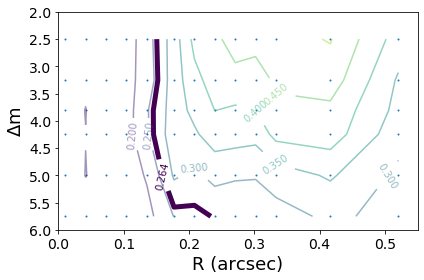

4


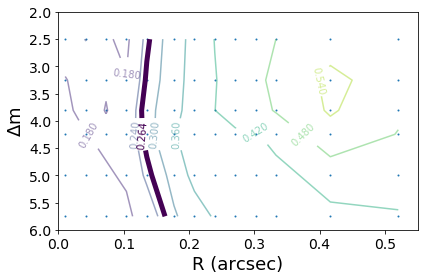

5


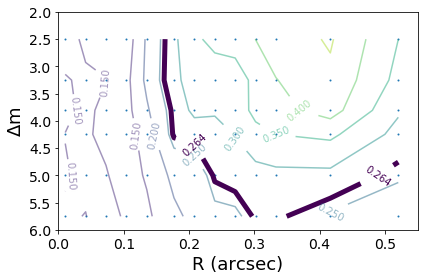

6


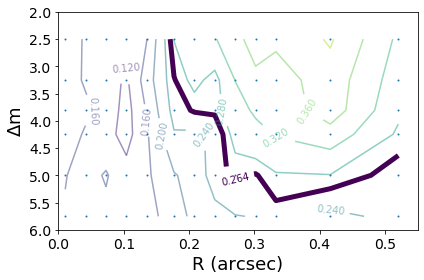

7


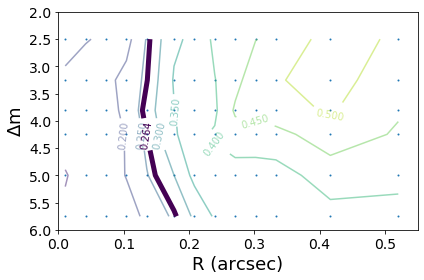

8


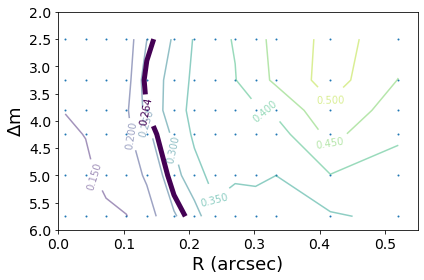

9


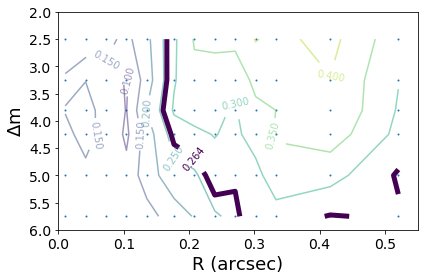

In [16]:
# loop through files: display the data, put into cube, and finally take average

for file_name_num in range(0,len(file_name_array)):
    print(file_name_num)
    
    # load data
    ks_data_this_slice = pickle.load( open( file_name_array[file_name_num], "rb" ) )
    
    X = ks_data_this_slice["x_axis"]
    Y_mag = ks_data_this_slice["Y_axis"]
    cube_stat_no_interp_avg = ks_data_this_slice["cube_stat_no_interp_avg"]
    
    # put into cube
    cube_ks_slices[file_name_num,:,:] = cube_stat_no_interp_avg
    
    # plot this one slice
    plt.clf()
    #cp3 = plt.contour(X, Y_mag, cube_stat_no_interp_avg, alpha = 0.5)
    #cp3.levels
    cp3 = plt.contour(X, Y_mag, cube_stat_no_interp_avg, alpha = 0.5)
    plt.clabel(cp3, inline=1, fontsize=10)
    cp4 = plt.contour(X, Y_mag, cube_stat_no_interp_avg, levels = crit_level, linewidths=5, color="k")
    plt.clabel(cp4, inline=1, fontsize=10)
    plt.scatter(df["dist_asec"],comp_ampl_mag, s=1)
    plt.gca().invert_yaxis()
    plt.xlabel("R (arcsec)", fontsize=18)
    plt.ylabel("$\Delta$m", fontsize=18)
    plt.xlim([0,0.55])
    plt.ylim([6,2])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    
    plt.show()

In [26]:
# take the average

cube_stat_no_interp_avg_avg = np.mean(cube_ks_slices, axis=0)

In [27]:
np.shape(cube_stat_no_interp_avg_avg)

(6, 13)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':


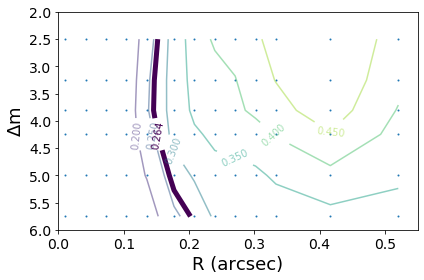

In [33]:
# plot the average of averages

# plot this one slice
plt.clf()
#cp3 = plt.contour(X, Y_mag, cube_stat_no_interp_avg, alpha = 0.5)
#cp3.levels
cp3 = plt.contour(X, Y_mag, cube_stat_no_interp_avg_avg, alpha = 0.5)
plt.clabel(cp3, inline=1, fontsize=10)
cp4 = plt.contour(X, Y_mag, cube_stat_no_interp_avg_avg, levels = crit_level, linewidths=5, color="k")
plt.clabel(cp4, inline=1, fontsize=10)
plt.scatter(df["dist_asec"],comp_ampl_mag, s=1)
plt.gca().invert_yaxis()
plt.xlabel("R (arcsec)", fontsize=18)
plt.ylabel("$\Delta$m", fontsize=18)
plt.xlim([0,0.55])
plt.ylim([6,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.show()
#plt.savefig("junk.pdf")

In [31]:
# extract the contour information
p_info = cp4.collections[0].get_paths()[0]
v = p_info.vertices
x = v[:,0] # radius (asec)
y = v[:,1] # delta_m (mag)
dict_pre_df = {"x": x, "y": y}
contour_info_df = pd.DataFrame(data=dict_pre_df)
csv_name = "lambda_B_cc_stripes_w_planets_avg_avg.csv"
contour_info_df.to_csv(csv_name)
print("Wrote " + csv_name)

Wrote lambda_B_cc_stripes_w_planets_avg_avg.csv
